## 들어가며

※ 과목명은 기계학습이지만 원문 그대로를 사용해 앞으로 머신러닝(Machine Learning, ML)이라는 표현을 사용한다.

- 머신러닝은 컴퓨터가 주어진 데이터를 학습해 스스로 새로운 규칙을 발견할 수 있도록 하는 기술이다. 이때, 인간은 컴퓨터가 스스로 학습할 수 있도록 하는 알고리즘을 제공해야 한다. 즉, 머신러닝의 핵심은 다양한 알고리즘에 있다.

- 그렇다면 우리는 어떤 알고리즘을 통해 컴퓨터를 학습시켜야 하는가? 아쉽게도 현재까지 나온 여러가지 알고리즘 중 모든 상황에서 가장 우월한 알고리즘은 없다. 그렇기 때문에 우리는 상황별로 컴퓨터가 가장 효율적으로 작동하는 머신러닝 알고리즘에 대해 이해하고 있어야 한다.

- 전통적인 통계 방법부터 시작해 최신의 이론까지 학습하는 방향이 이러한 한계점을 극복하는 방법이 될것이다.

### 머신러닝 작동 원리

In [1]:
from IPython.display import Image

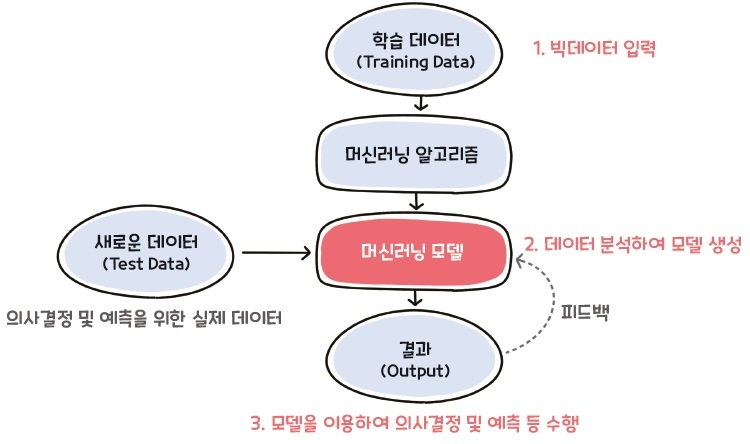

In [2]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_01.jpg")

#### 학습 데이터(training data)와 테스트 데이터(test data)

- 컴퓨터가 주어진 데이터와 머신러닝 알고리즘을통해 학습하는 과정은 위 그림과 같다. 이 과정에서 데이터가 학습 데이터(training data)와 테스트 데이터(test data)로 나뉜다. 학습 데이터는 컴퓨터가 학습하기 위해 사용되는 데이터로 알고리즘을 통해 실제 모델이 생성되는데 사용되는 데이터이며, 테스트 데이터는 학습 데이터로 생성된 모델이 잘 작동하는지 확인하기 위한 데이터로 사전에 전체 데이터에서 일부를 랜덤하게 구분해 놓는다.

- 테스트 데이터로 생성된 모델이 잘 작동하는지 확인하는 구체적인 방법은 여러가지 알고리즘을 학습하면서 확인해보자.

#### 지도학습(supervised learning)과 비지도학습(unsupervised learning)

- 머신러닝 알고리즘에서는 주어진 데이터의 형태에 따라 예측/분류 또는 군집을 구분하게 되는데 이를 각각 지도학습(supervised learning)과 비지도학습(unsupervised learning)이라고 한다.

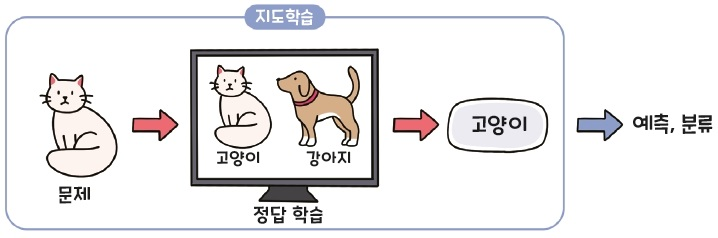

In [3]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_02.jpg")

- 예를들어 위의 그림처럼 고양이, 강아지 그림(X)과 '고양이', '강아지'라는 정답(Y, label)이 있는 데이터의 경우 머신러닝 알고리즘으로 학습한 모델이 새로운 문제를 받았을 때 그 그림에 매칭되는 정답을 결과값으로 출력하게 된다. 즉, 문제와 정답 두 내용이 같이 포함된 데이터의 경우 예측/분류(prediction)가 가능한 머신러닝 알고리즘을 사용한 모델을 생성할 수 있다.

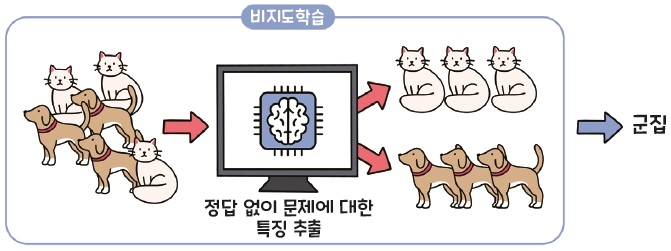

In [4]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_03.jpg")

- 반대로 위의 그림처럼 고양이, 강아지 그림(X)만 주어진 경우, 즉 정답(label)이 주어지지 않은 경우 데이터 자체에 정답이 없기 떄문에 예측/분류가 가능하지 않지만 주어진 특성에 대한 정보(X)만을 활용해 비슷한 데이터끼리 군집화(clustering)하는 머신러닝 알고리즘을 사용한 모델을 생성할 수 있다.

- 즉, 주어진 데이터에 개체들의 특성과 함께 label 정보의 유무에 따라 지도학습과 비지도학습으로 구분된다.

### K-Nearest Neighbor (KNN)

- 머신러닝 알고리즘 학습의 시작으로 가장 직관적으로 이해할 수 있는 K-Nearest Neighbor(KNN)에 대해 알아보자. 사실 KNN의 경우 다른 머신러닝 알고리즘과는 달리 모델을 학습해 예측하는 것이 아니라 학습 데이터가 있는 가운데 새로운 객체가 주어지면 그 데이터의 특성(X)과 유사한 학습 데이터 객체들을 찾아 정답(Y)를 예측하는 방법을 사용한다.

- 이러한 이유로 KNN을 객체/사례 기반 학습(instance-based learning) 또는 모델을 준비하지 않고 새로운 데이터가 들어올때까지 기다렸다 작동하는것을 게으르단 표현을 사용해 게으른 학습(lazy learning)이라고 부른다. 또한 모델이 학습하는 형태가 아니기 때문에 학습 데이터를 참조 데이터(reference data)라고 부른다.

#### 생각해보자 - 물음표(?) 위치에 새로운 값이 들어온다면?

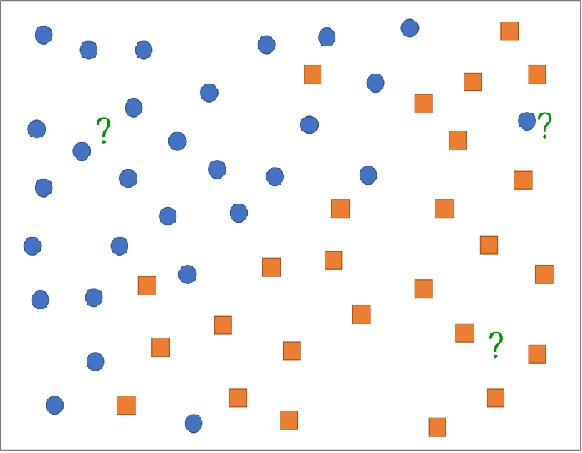

In [5]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_04.jpg")

- 주변에 파란색 원만 있거나 주황색 네모만 있는 경우에는 물음표(?)에 해당되는 객체를 근처에 있는 파란색 원 또는 주황색 네모로 쉽게 예측할 수 있다. 하지만 주변에 파란색 원과 주황색 네모가 동시에 존재하는 경우 어떤 것을 우선순위로 두어 예측해야 할 지 판단이 힘들다. 판단 기준을 명확하게 하기 위해서는 '가깝다'의 기준을 명확히 할 필요가 있다.

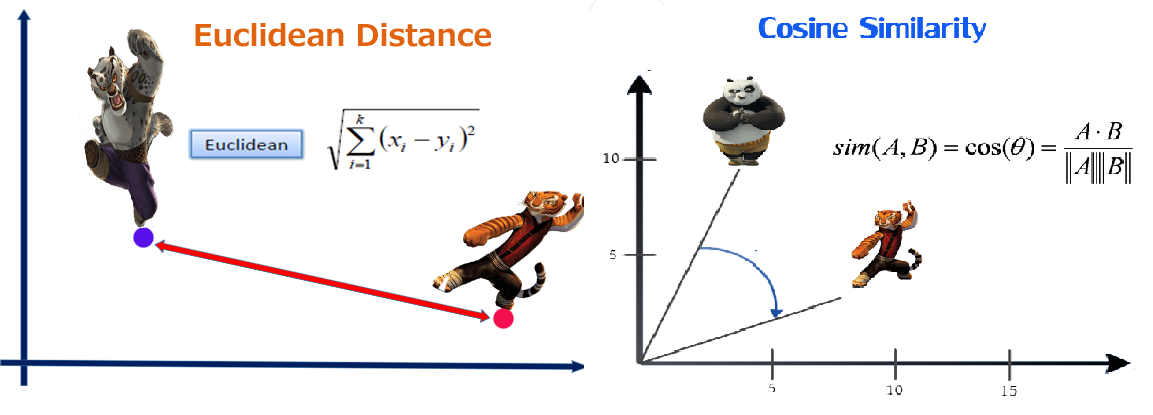

In [6]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_05.jpg")

- 가깝다의 기준으로 보통 유클리디안 거리(euclidean distance) 또는 코사인 유사도(cosine similarity)를 사용하는데 이는 데이터의 종류에 따라 선택해 사용할 수 있다.

※ 객체간의 거리를 측정하게되는 경우 정규화 또는 스케일링 과정을 통해 각 변수들이 거리에 주는 영향이 왜곡되지 않도록 주의해야 한다.

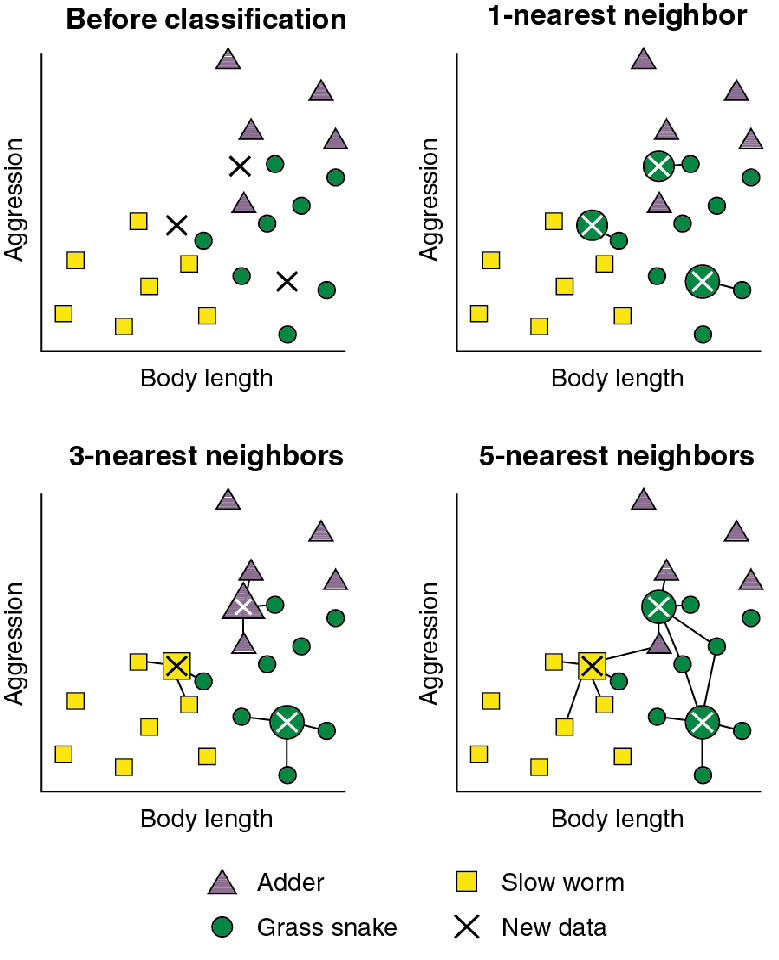

In [7]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_06.jpg")

- 새로 들어온 X가 주변의 K개의 이웃에 의해 결정되는 방식에는 이웃들의 거리정보를 반영해 결정하는 가중합(weighted voting)방식과 다수결(majority voting)로 결정하는 방식이 있다.

※ 가중치로는 1/d, 1/(1+d), 1/(1+d^2), e^(-d) 등의 방식을 사용한다. (d = distance)

#### K = ? (Hyper-parameter)

※ 하이퍼 파라미터(Hyper-parameter)는 어떠한 임의의 모델을 학습시킬때 컴퓨터가 아닌 사람이 직접 튜닝(tuning)하는 변수를 말한다.

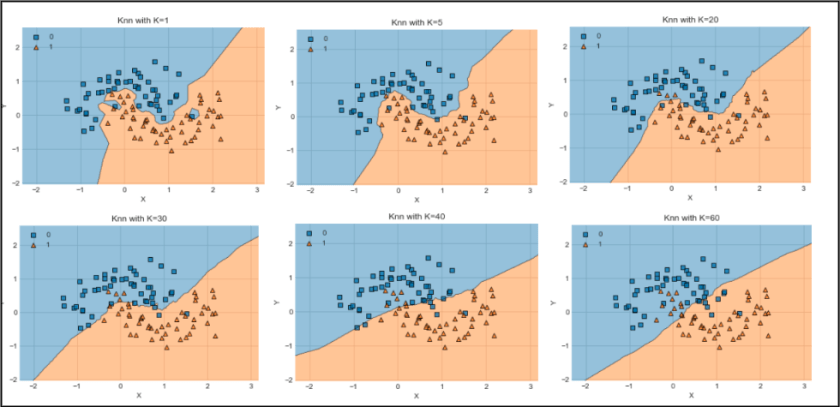

In [8]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_07.jpg")

- 알고리즘의 이름에도 들어가 있는 만큼 이웃의 수(K)를 결정하는것은 KNN 알고리즘의 핵심이다. 일반적으로 K값이 너무 작게 설정되는 경우 분류 경계면이 노이즈(noise)에 민감하게 반응해 과적합(over-fitting)의 우려가 있는 반면에 K값이 너무 크게 설정되는 경우 지역적 구조(local structure)를 민감하게 파악하는 능력을 잃어 부적합(under-fitting)하는 경향이 있다. 즉, 적절한 K값을 찾아내는 것이 KNN의 성능을 좌우하는(최적화시키는) 가장 핵심적인 요소이다.

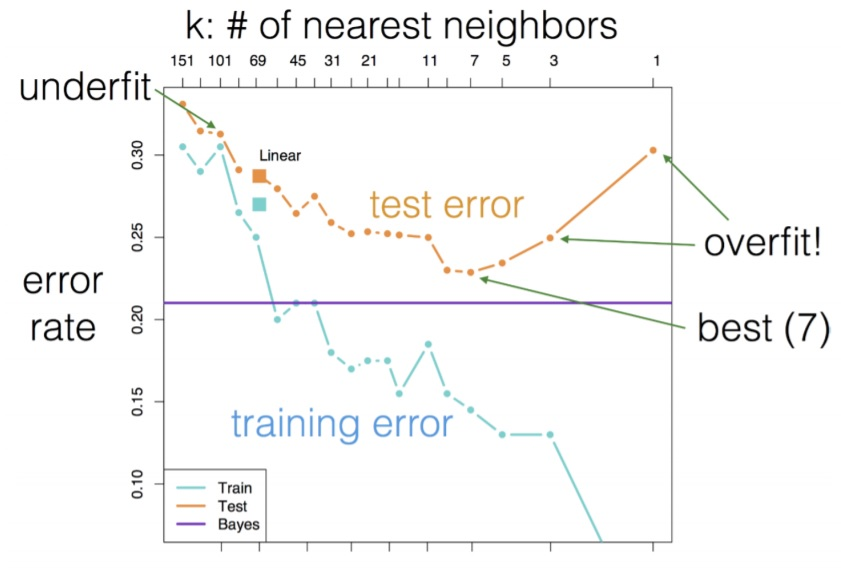

In [9]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_08.jpg")

### KNN 실습 - Toy Example

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [12]:
# Toy Example 불러오기
import mglearn
X, Y = mglearn.datasets.make_forge()

In [13]:
# 독립변수 확인
print(X)
print(X.shape)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
(26, 2)


In [14]:
# 종속변수 확인
print(Y)
print(Y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
(26,)


forge 데이터 산점도


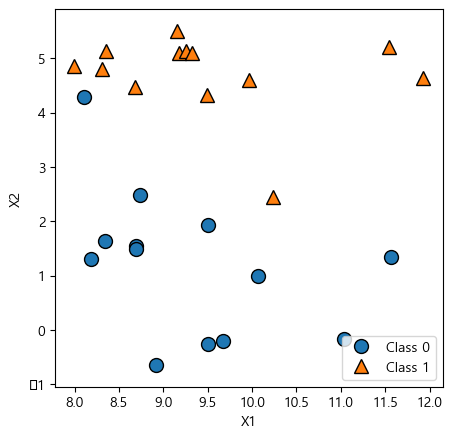

In [15]:
# 산점도 그리기
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5, 5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel('X1')
plt.ylabel('X2')
print('forge 데이터 산점도')

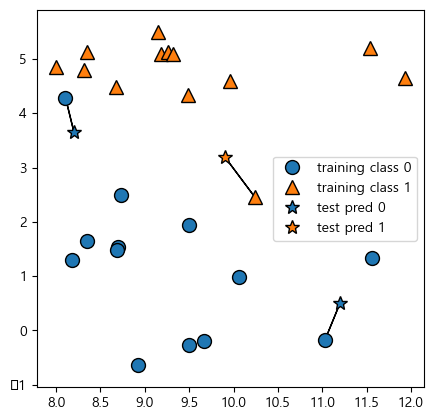

In [16]:
# K = 1인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 1)

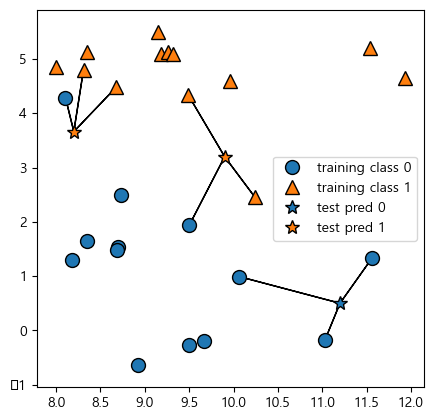

In [17]:
# K = 3인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 3)

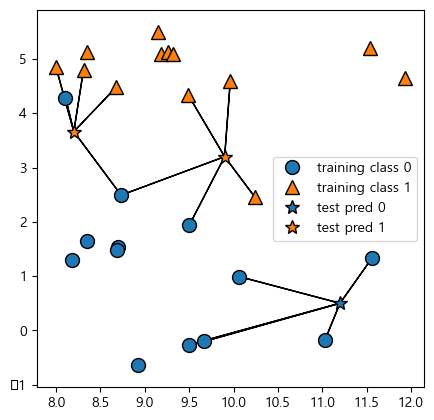

In [18]:
# K = 5인 경우
mglearn.plots.plot_knn_classification(n_neighbors = 5)

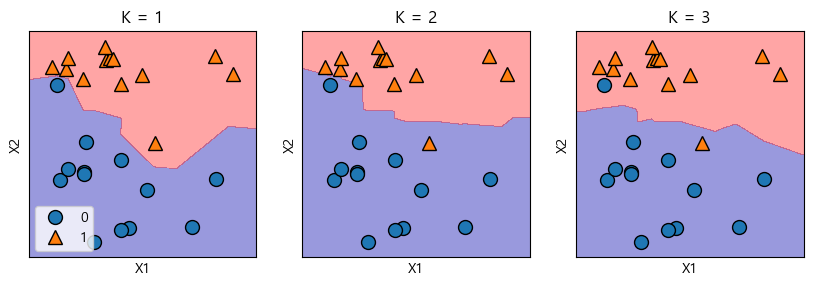

In [19]:
#모형 결정 경계선 변화 확인
from sklearn import neighbors

fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([1, 2, 3], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)

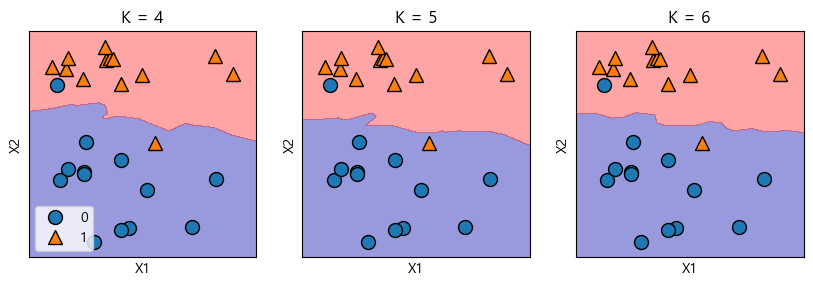

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([4, 5, 6], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)

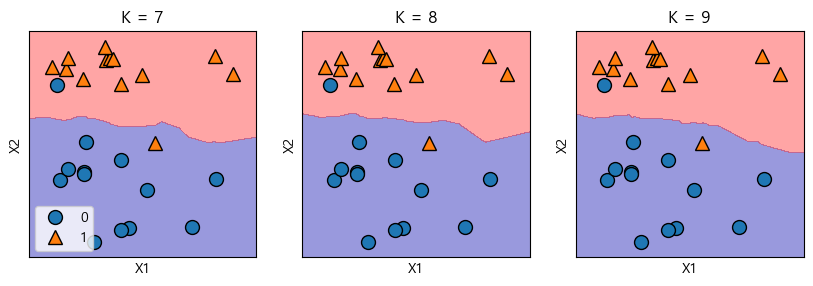

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for k, ax in zip([7, 8, 9], axes):
    forge_knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(X, Y)
    mglearn.plots.plot_2d_separator(forge_knn,X,fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0],X[:, 1], Y, ax = ax)
    ax.set_title("K = {}".format(k))
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")

axes[0].legend(loc = 3)

### KNN 실습 - Personal Loan 데이터셋

#### [데이터 설명]
#### 독립변수
- ID: 고객 ID
- Age: 고객 나이
- Experience: 고고객 직업 경험 수행기간
- Income: 연간 고객의 수입
- ZIPCode: 고객의 주소 ZIP 코드
- Family: 고객의 가구수
- CCAvg : 월 평균 고객의 신용카드 사용금액
- Education: 고객의 교육수준  1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: 고객의 주택 담보 가치
- Securities Account: 고객의 증권계좌 보유여부
- CD Account: 고객의 예금증서 보유 여부
- Online: 고객의 온라인뱅킹 여부
- CreditCard: 고객의 신용카드 발급여부

#### 종속변수
-  Personal Loan(대출여부): 1 or 0

In [22]:
ploan = pd.read_csv("C:/Users/com/Desktop/ML/Lecture_01/Personal Loan.csv")
ploan.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [23]:
# 미사용 변수, NA 제거
ploan_knn_df = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [24]:
# 독립변수와 종속변수 분리
feature_columns = list(ploan_knn_df.columns.difference(["Personal Loan"]))
X = ploan_knn_df[feature_columns]
Y = ploan_knn_df['Personal Loan']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y,train_size=0.7,test_size=0.3,random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1750, 11) (750, 11) (1750,) (750,)


In [27]:
import sklearn.preprocessing as preprocessing

In [28]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [29]:
from sklearn import neighbors

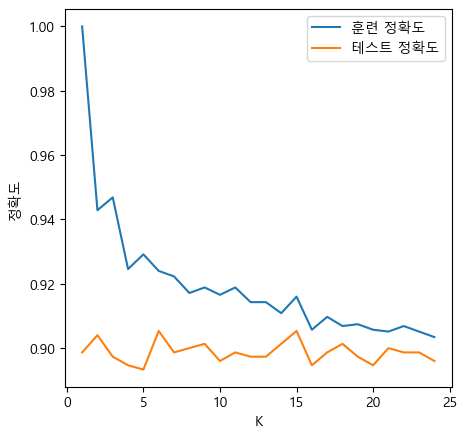

In [30]:
training_accuracy = []
test_accuracy = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    ploan_knn.fit(X_train, Y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(ploan_knn.score(X_train, Y_train))
    # 일반화 정확도 저장
    test_accuracy.append(ploan_knn.score(X_test, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_accuracy, label="훈련 정확도")
plt.plot(k_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("K")
plt.legend()

In [31]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_accuracy==max(test_accuracy)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 6


In [32]:
# 최적의 K값에서 테스트 데이터의 Y예측값
best_ploan_knn = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_ploan_knn.fit(X_train, Y_train)
best_ploan_knn.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
n_test = len(Y_test)
Y_predict = best_ploan_knn.predict(X_test)

print('테스트 데이터 개수:', n_test)
print('예측과 일치한 데이터 개수:', sum(Y_test == Y_predict))
print('일치 비율:',round(sum(Y_test == Y_predict)/n_test*100,2),'%')

테스트 데이터 개수: 750
예측과 일치한 데이터 개수: 679
일치 비율: 90.53 %


#### 성능평가지표 - 오차행렬 (confusion matrix)

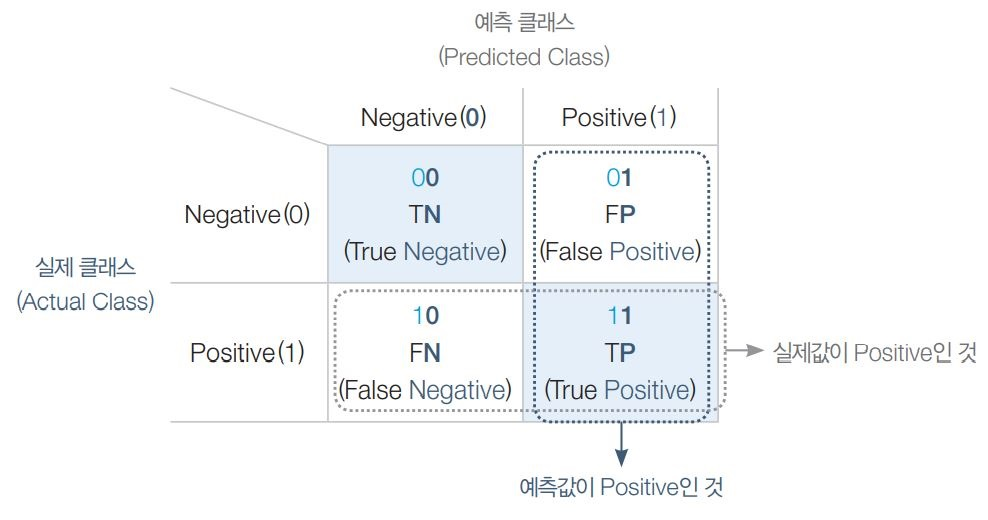

In [34]:
Image("C:/Users/com/Desktop/ML/Lecture_01/Lecture_01_figure_09.jpg")

$
\begin{equation}
Accuracy \ (정확도) = \frac{예측 결과와 실제값이 동일한 건수}{전체 예측 건수} = \frac{TN+TP}{TN+FP+FN+TP}
\end{equation}
$

- 전체 예측건수에서 예측이 성공한 건수의 비율을 나타낸 값을 정확도(accuracy)로 나타낸다.

$
\begin{equation}
Precision \ (정밀도) = \frac{TP}{FP+TP}
\end{equation}
$

- 정밀도(precision)는 예측이 Positive인 것(TP, FP) 중 참인 것(TP)의 비율을 의미한다. 즉, Positive 예측 성능을 더 정밀하게 평가하기 위한 지표이다.

$
\begin{equation}
Recall \ (재현율) = \frac{TP}{FN+TP}
\end{equation}
$

- 재현율(recall)은 실제값이 Positive인 것(FN+TP)인 것 중에서 참인 것(TP)의 비율을 의미한다. 즉, Positive인 데이터를 정확히 예측했는지 평가하는 지표로 민감도(sensitivity) 또는 TPR(True Positive Rate)라고도 부른다.

$
\begin{equation}
F1 = 2\times \frac{Precision \times Recall}{Prescision + Recall}
\end{equation}
$

- F1 스코어(F1 score)는 정밀도와 재현율을 결합한 평가 지표이다. 정밀도와 재현율이 서로 트레이드 오프 관계(trade-off, 상충관계)인 문제저을 고려하여 정확한 평가를 위해 많이 사용한다.

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [36]:
# 오차행렬(confusion matirx)를 통해 최적의 K에서의 예측 성능 확인
confusion_matrix(Y_test, Y_predict)

array([[660,  13],
       [ 58,  19]], dtype=int64)

In [37]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)

In [38]:
result_mat = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1'], index =['KNN_best'])
result_mat.loc['KNN_best']=[accuracy, precision, recall, f1]
result_mat

,accuracy,precision,recall,f1
KNN_best,0.905333,0.59375,0.246753,0.348624
